# Analysis of Clonesig performance and comparison with other methods on simulated data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import pandas as pd
import os
from statsmodels.stats.multitest import multipletests


pd.options.display.max_columns = 200

method_color_dict = {'ccube': '#548ebb', 'clonesig': '#fc9d53',
                     'deconstructsigs':'#793d66', 'palimpsest':'#e45683',
                     'pyclone': '#87d0bd', 'sciclone': '#e1f5aa',
                     'tracksig': '#c4c3f9'}
hatch_dict = {'prefit': '/', 'cancertype': '.', 'cancer_type': '.',
             'all': '', 'all_nuclonal': '+'}
sns.set_context("poster", font_scale=2)
mpl.rcParams['hatch.linewidth'] = 3
pd.options.display.max_columns = 200
phd_folder_path = '/Users/JudithAbecassis/Documents/PhD'
os.chdir('{}/TCGA_signatures'.format(phd_folder_path))
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [37]:
clonesig_res_ith.head()

,cancer_type,perc_diploid,nb_clones,nb_mut,nb_sig,nb_sig_fit,min_dist,max_dist,avg_dist,avg_major_cn,actual_perc_diploid,avg_tot_cn,method,setting,dof,fitted_nb_clones,ll_ratio,pval,score1B,score1C,score2A,score2C_auc,score2C_accuracy,score2C_sensitivity,score2C_specificity,score2C_precision,score_sig_1A,score_sig_1B,score_sig_1C_auc,score_sig_1C_accuracy,score_sig_1C_sensitivity,score_sig_1C_specificity,score_sig_1C_precision,score_sig_1D,min_diff_distrib_mut,max_diff_distrib_mut,std_diff_distrib_mut,median_diff_distrib_mut,perc_dist_5,perc_dist_10,runtime,timestamp,full_method
0,0,0,1,100,19.0,19.0,NaN,NaN,NaN,2.24,0.0,3.26,clonesig,cancer_type,9.0,1.0,0.001006,0.999991,1.0,0.999990,1.00000,NaN,1.00,0.0,1.00,0.0,0.097908,0.033323,0.930108,0.938462,0.50,0.951613,0.333333,0.58,0.028239,0.028239,0.000000e+00,0.028239,1.0,1.0,59.305515,1.563696e+09,clonesig-cancer_type
1,0,0,1,100,65.0,15.0,NaN,NaN,NaN,2.24,0.0,3.26,clonesig,prefit,11.0,1.0,0.000138,1.000000,1.0,0.999990,1.00000,NaN,1.00,0.0,1.00,0.0,0.074041,0.070095,0.591398,0.800000,0.25,0.822581,0.076923,0.22,0.119873,0.119873,0.000000e+00,0.119873,0.0,0.0,65.642633,1.563696e+09,clonesig-prefit
2,0,0,1,100,65.0,65.0,NaN,NaN,NaN,2.24,0.0,3.26,clonesig,all,26.0,1.0,0.003236,0.999999,1.0,0.999990,1.00000,NaN,1.00,0.0,1.00,0.0,0.073735,0.069125,0.623656,0.769231,0.25,0.790323,0.066667,0.22,0.117872,0.117872,5.551115e-17,0.117872,0.0,0.0,64.597808,1.563696e+09,clonesig-all
3,0,0,1,100,65.0,65.0,NaN,NaN,NaN,2.24,0.0,3.26,clonesig,all_nuclonal,26.0,1.0,0.003236,0.999999,1.0,0.999990,1.00000,NaN,1.00,0.0,1.00,0.0,0.073735,0.069125,0.623656,0.769231,0.25,0.790323,0.066667,0.22,0.117872,0.117872,5.551115e-17,0.117872,0.0,0.0,52.740454,1.563696e+09,clonesig-all_nuclonal
4,0,0,1,100,NaN,NaN,NaN,NaN,NaN,2.24,0.0,3.26,pyclone,all,NaN,4.0,NaN,NaN,1.0,0.981214,0.32095,NaN,0.97,0.0,0.97,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,1.563695e+09,pyclone-all


In [36]:
clonesig_res = pd.read_csv('201907824_eval_compare_simulations_new.csv', sep='\t')
clonesig_res = clonesig_res.assign(full_method=clonesig_res.method + '-' + clonesig_res.setting)
clonesig_res_ith = clonesig_res[clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest'])]
clonesig_res_sig = clonesig_res[clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest'])]

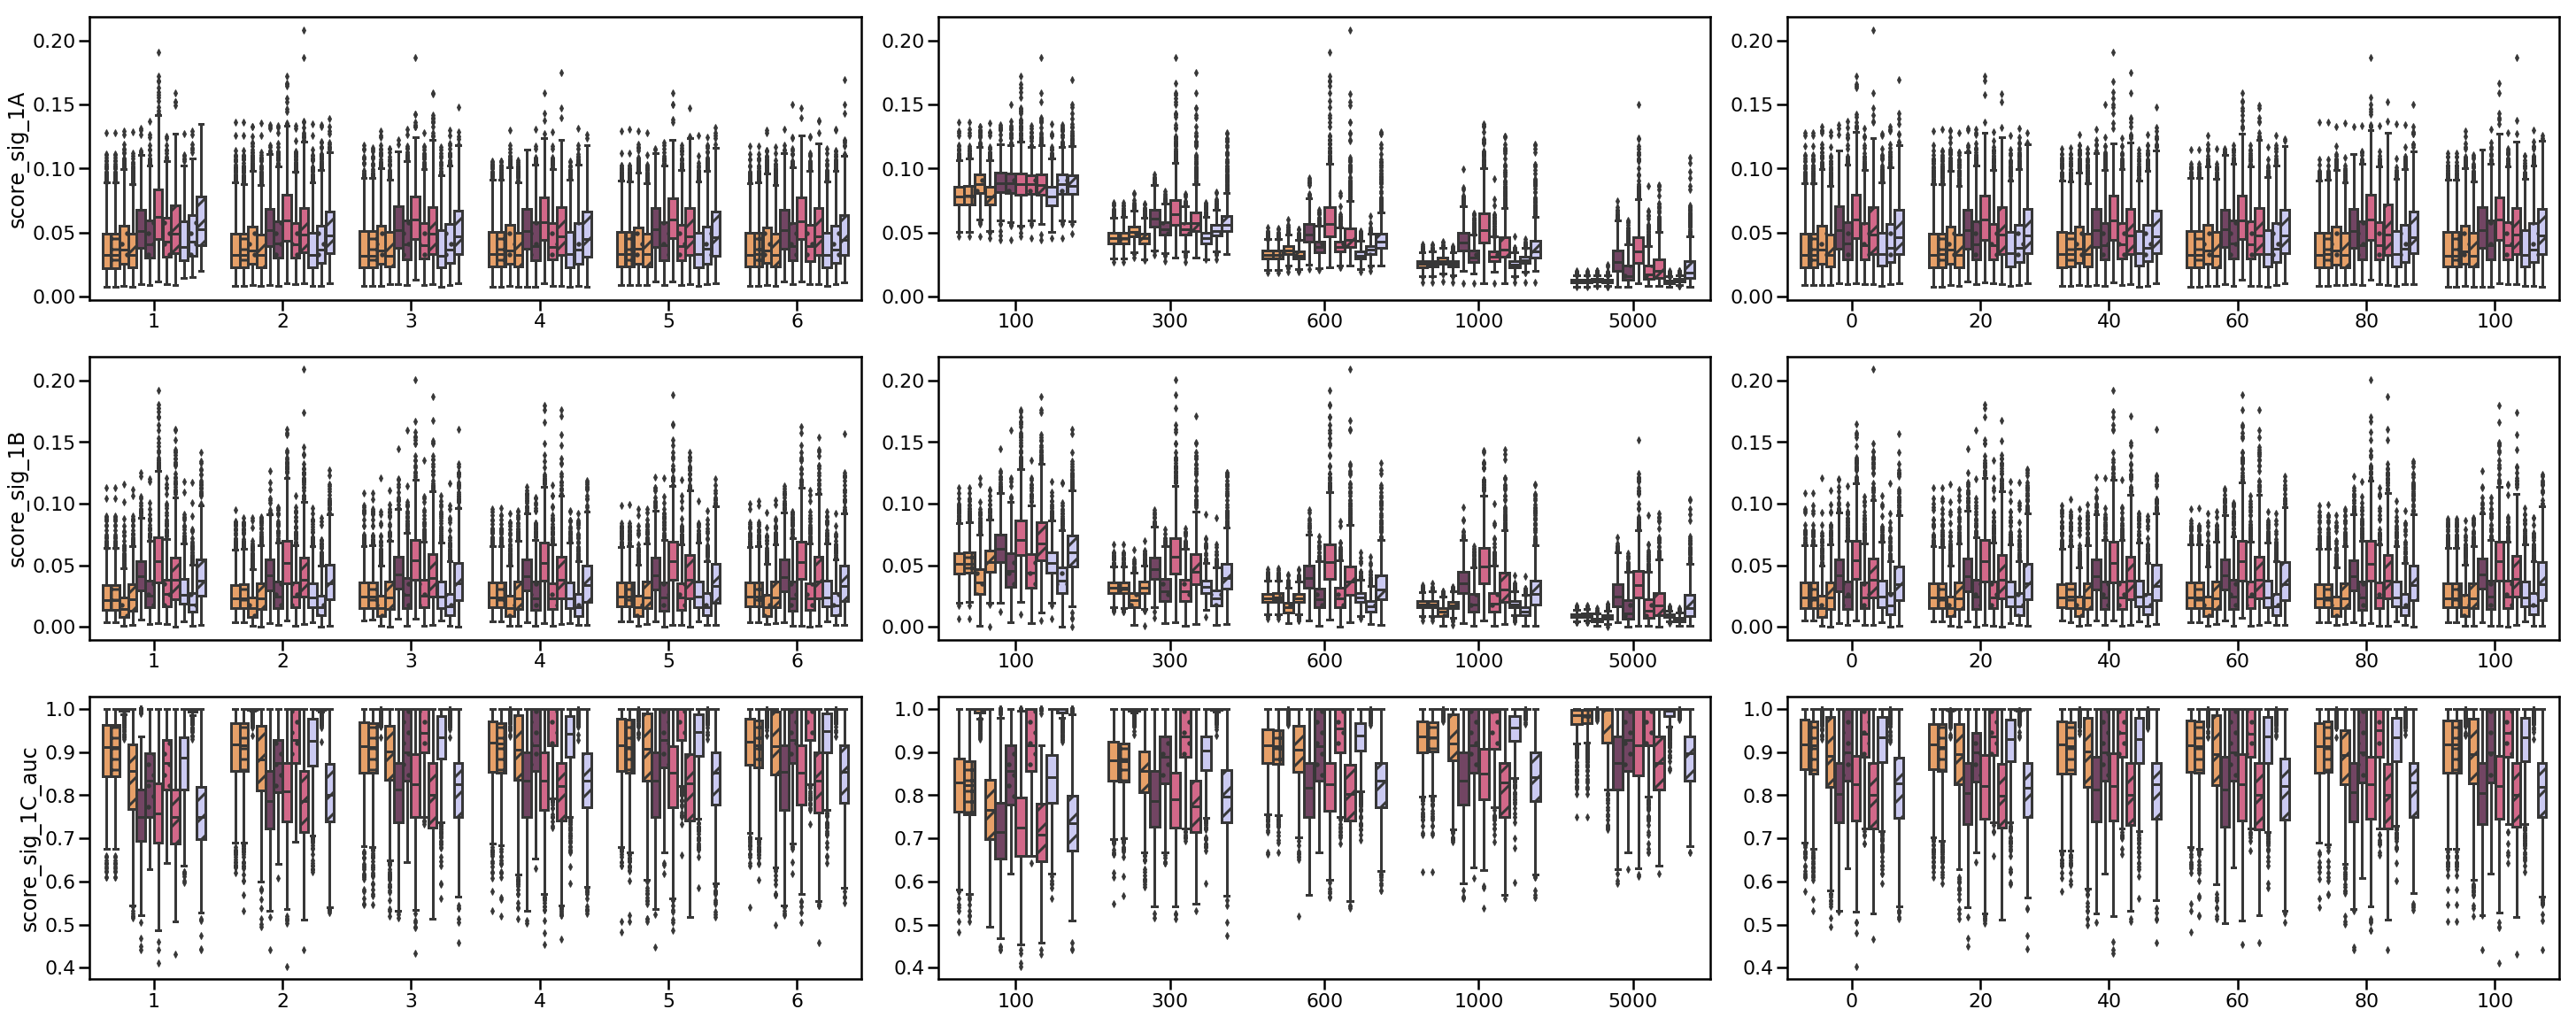

In [47]:
metrics_list = ['score_sig_1A', 'score_sig_1B', 'score_sig_1C_auc']
sns.set_context('poster', font_scale=1)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(50, 20))
for ii, score in enumerate(metrics_list):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
        else:
            sub_clonesig_res = clonesig_res_ith
        if score == 'runtime':
            sub_clonesig_res = clonesig_res

        sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res.full_method.unique()), ax=axes[ii, jj])
        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        for i in range(n):
            h = ax.artists[i]
            h.set_hatch(hatch_dict['_'.join(labels[i][1].split('-')[1:])])



        if (ii==10) and (jj==10):
            # build custom legend
            legend_items = list()
            for key in sorted(sorted(sub_clonesig_res.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=key))

            first_legend = ax.add_artist(ax.legend(handles=legend_items, bbox_to_anchor=(1.05, 1),
                                       loc=2, fontsize=30, title='methods'))
            other_handles = [Patch(facecolor='white', edgecolor='black', label='all'),
                             Patch(facecolor='white', edgecolor='black', label='prefit', hatch='/'),
                             Patch(facecolor='white', edgecolor='black', label='cancer_type', hatch='.'),
                             Patch(facecolor='white', edgecolor='black', label='clonal multiplicity', hatch='+')]
            other_ = ax.legend(handles=other_handles,
                                         bbox_to_anchor=(1.05, 0.), fontsize=30,
                                         title='mode', loc=2)
        else:
            ax.get_legend().remove()
        if jj!=0:
            ax.set_ylabel('')
        if ii!=3:
            ax.set_xlabel('')

plt.subplots_adjust(wspace=0.1)

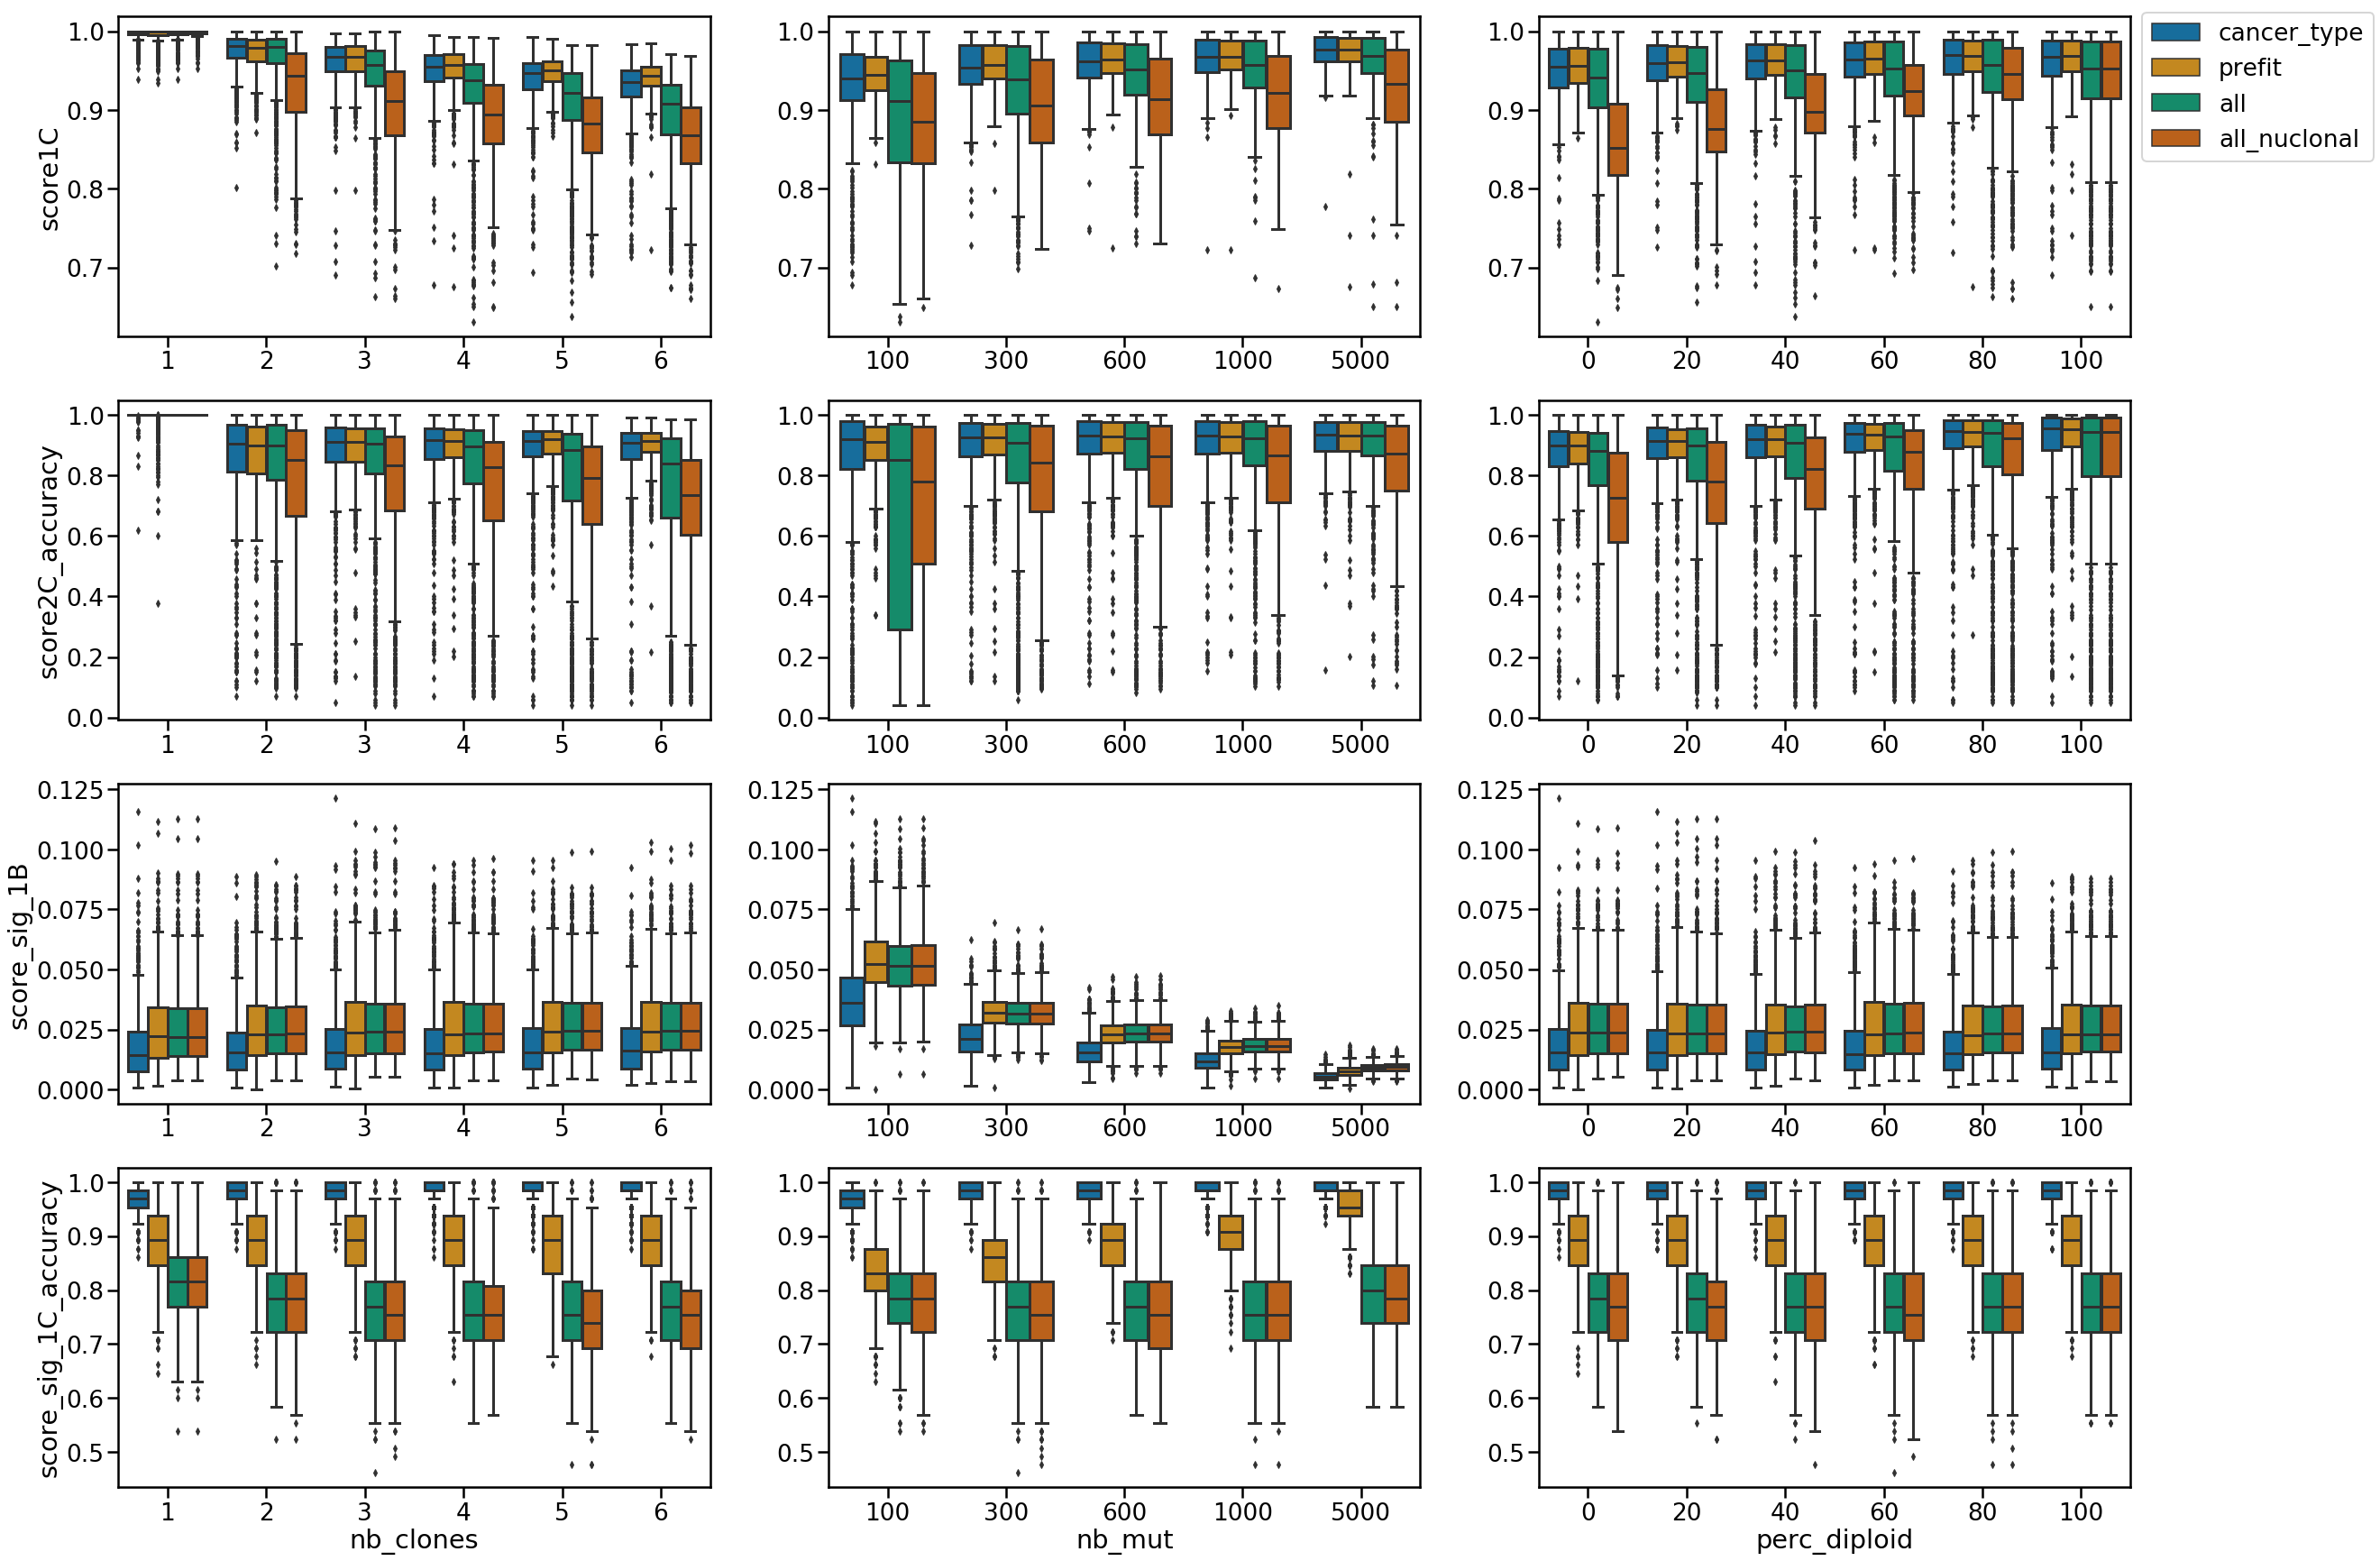

In [18]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 30))
for ii, score in enumerate(('score1C', 'score2C_accuracy', 'score_sig_1B',
                 'score_sig_1C_accuracy')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig[clonesig_res_sig.method=='clonesig']
        else:
            sub_clonesig_res = clonesig_res_ith[clonesig_res_ith.method=='clonesig']
        if score == 'runtime':
            sub_clonesig_res = clonesig_res[clonesig_res.method=='clonesig']


        sns.boxplot(x=covariate, y=score, hue="setting",
                        data=sub_clonesig_res,
                        ax=axes[ii, jj], palette='colorblind')

        ax = axes[ii, jj]
        if (ii==0) and (jj==2):
            ax.legend(loc=2, bbox_to_anchor=(1, 1.05))
        else:
            ax.get_legend().remove()
        if jj!=0:
            ax.set_ylabel('')
        if ii!=3:
            ax.set_xlabel('')

        plt.savefig('20190801_paper_figures/altervatives_clonesig_mode.pdf', bbox_inches='tight')


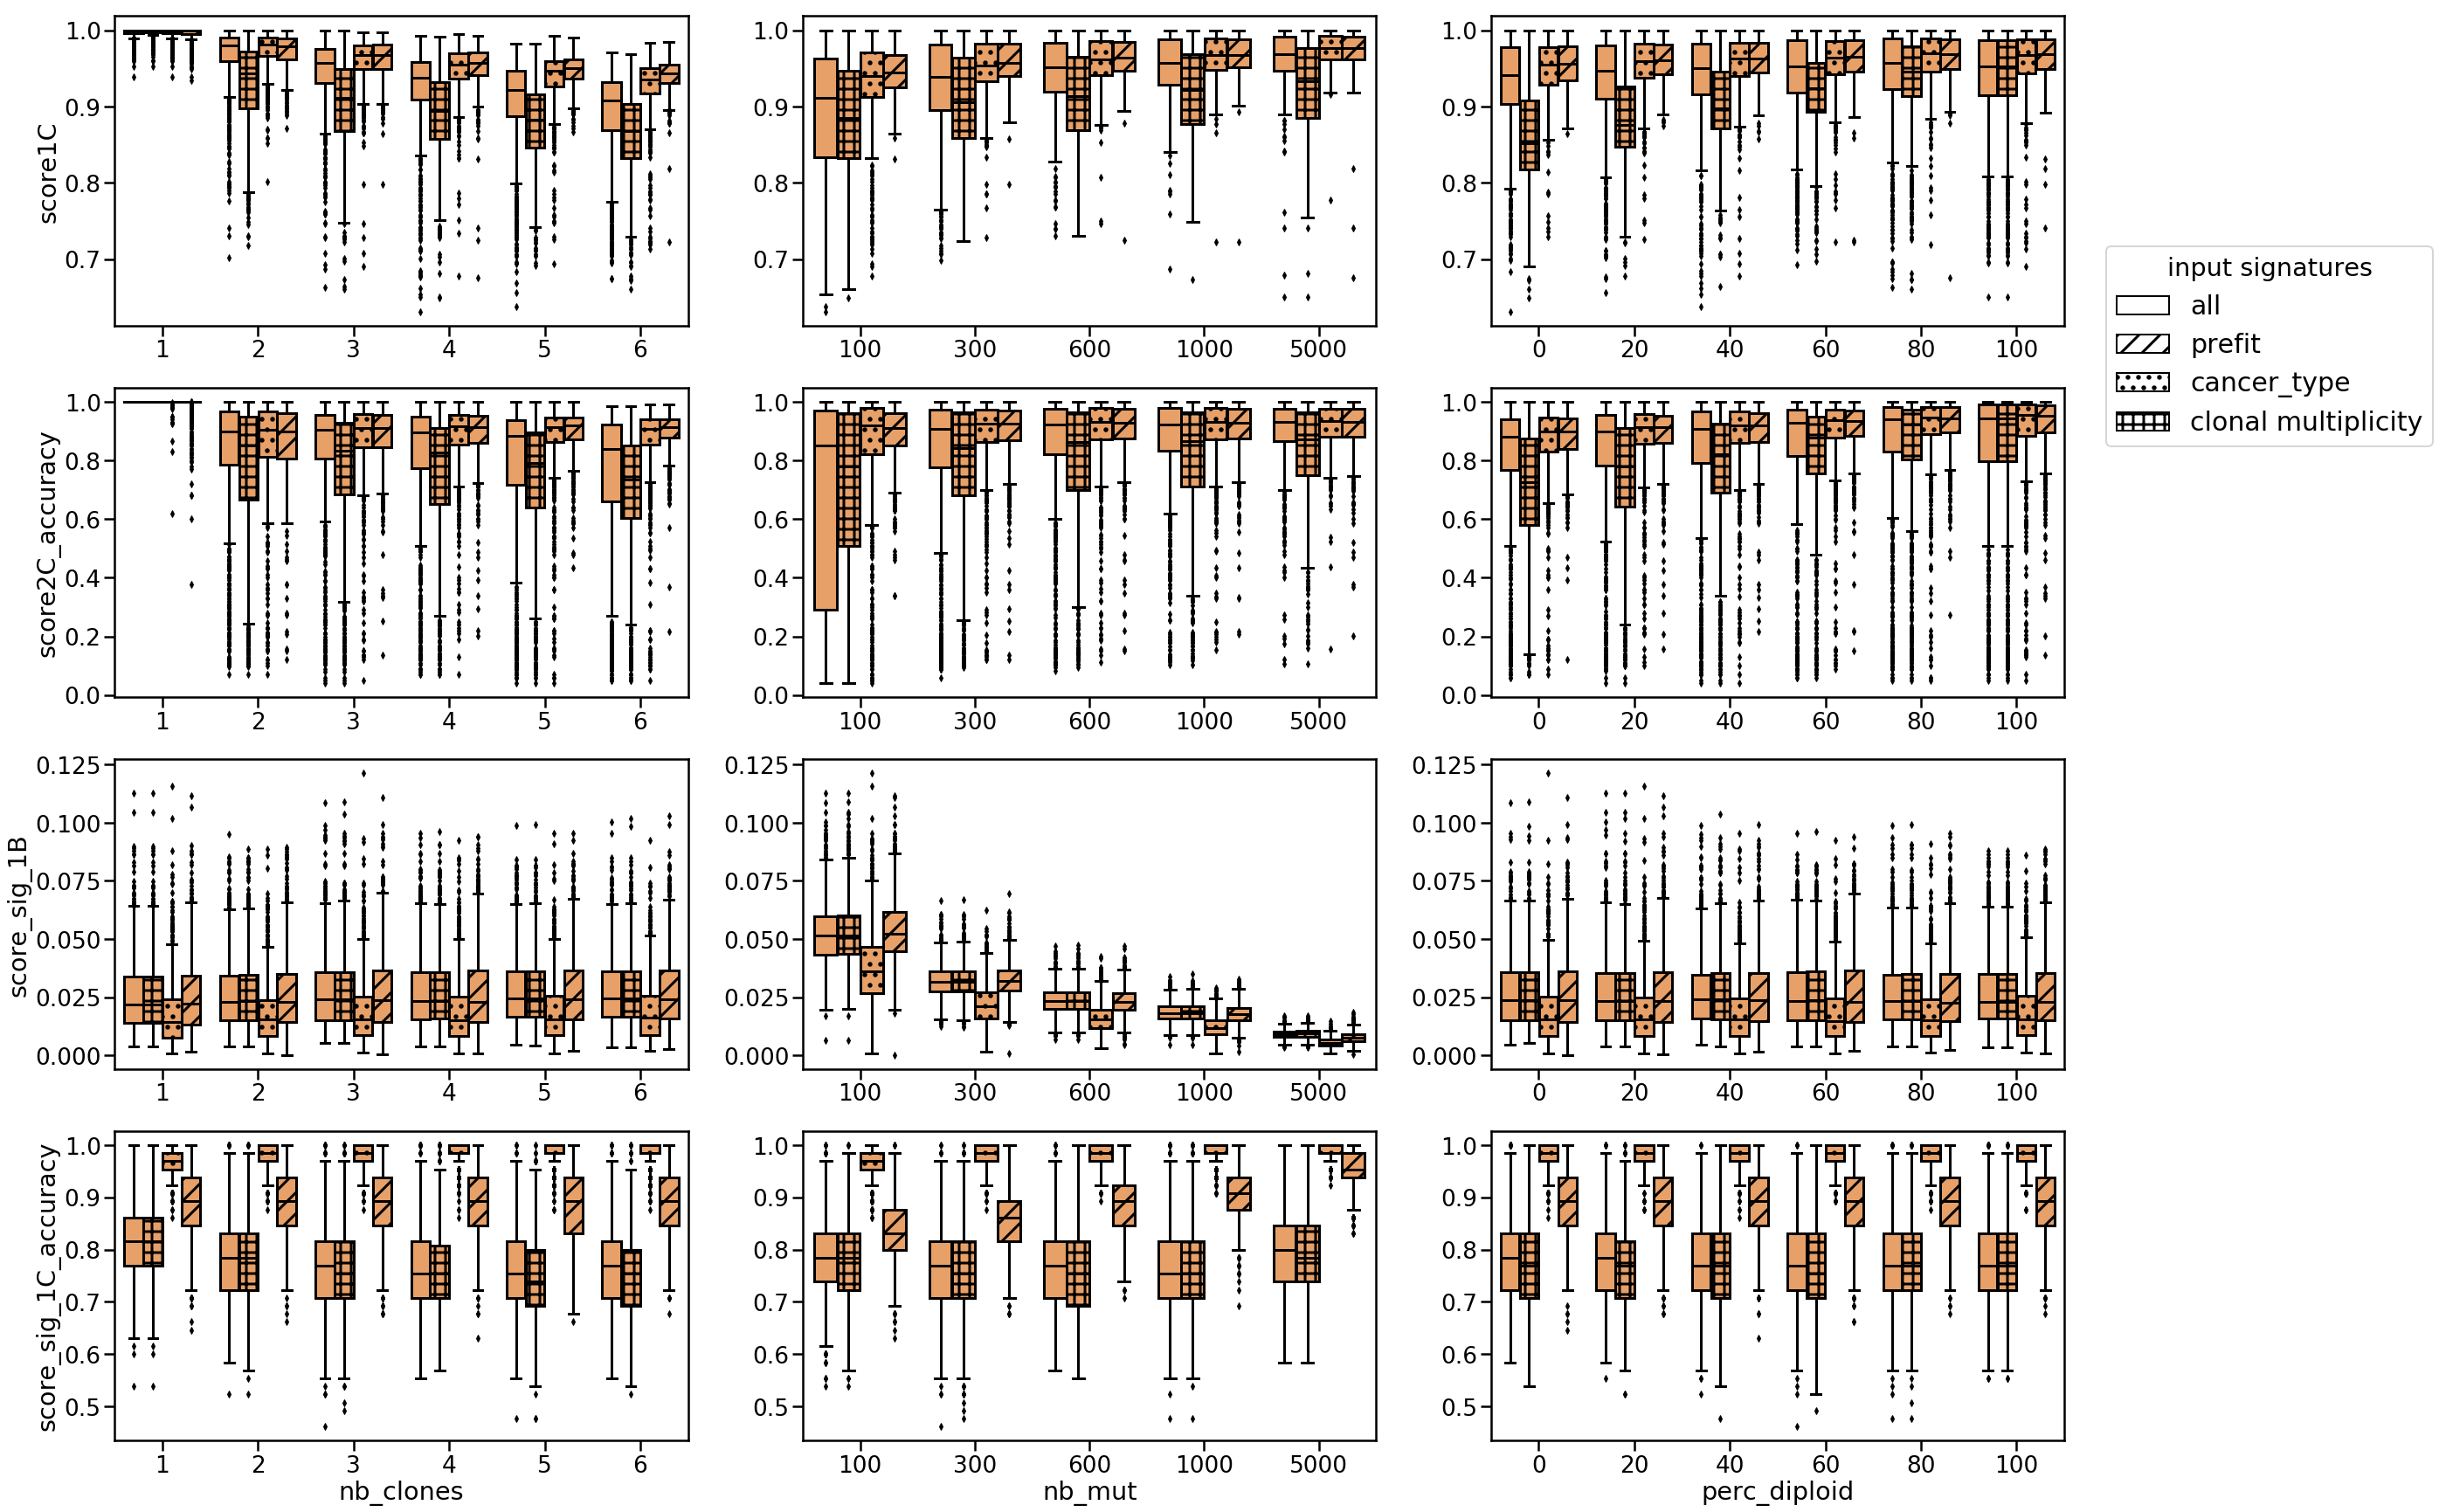

In [19]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 30))
for ii, score in enumerate(('score1C', 'score2C_accuracy', 'score_sig_1B',
                 'score_sig_1C_accuracy')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig[clonesig_res_sig.method=='clonesig']
        else:
            sub_clonesig_res = clonesig_res_ith[clonesig_res_ith.method=='clonesig']
        if score == 'runtime':
            sub_clonesig_res = clonesig_res[clonesig_res.method=='clonesig']


        sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res.full_method.unique()), ax=axes[ii, jj])

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        for i in range(n):
            h = ax.artists[i]
            h.set_hatch(hatch_dict['_'.join(labels[i][1].split('-')[1:])])
            h.set_edgecolor('black')
            for jjj in range(i*6,i*6+6):
                line = ax.lines[jjj]
                line.set_color('black')
                line.set_mfc('black')
                line.set_mec('black')
        if (ii==0) and (jj==2):
            # build custom legend

            other_handles = [Patch(facecolor='white', edgecolor='black', label='all'),
                             Patch(facecolor='white', edgecolor='black', label='prefit', hatch='/'),
                             Patch(facecolor='white', edgecolor='black', label='cancer_type', hatch='.'),
                             Patch(facecolor='white', edgecolor='black', label='clonal multiplicity', hatch='+')]
            other_ = ax.legend(handles=other_handles,
                                         bbox_to_anchor=(1.05, 0.3), fontsize=30,
                                         title='clonesig mode', loc=2)
        else:
            ax.get_legend().remove()
        if jj!=0:
            ax.set_ylabel('')
        if ii!=3:
            ax.set_xlabel('')

plt.savefig('20190801_paper_figures/altervatives_clonesig_mode_true_color.pdf', bbox_inches='tight')
        #plt.savefig('paper_figures/simulations_{}_{}.pdf'.format(score, covariate.replace('_', '')), bbox_extra_artists=(first_legend, other_), bbox_inches='tight')


In [20]:
methods_to_use = ['deconstructsigs-cancertype', 'clonesig-cancer_type',
                  'palimpsest-cancertype', 'ccube-all', 'sciclone-all',
                  'pyclone-all', 'tracksig-cancertype']
reduced_clonesig_res = clonesig_res[clonesig_res.full_method.isin(methods_to_use)]
clonesig_res_ith = reduced_clonesig_res[reduced_clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'pyclone', 'tracksig', 'palimpsest'])]
clonesig_res_sig = reduced_clonesig_res[reduced_clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest'])]

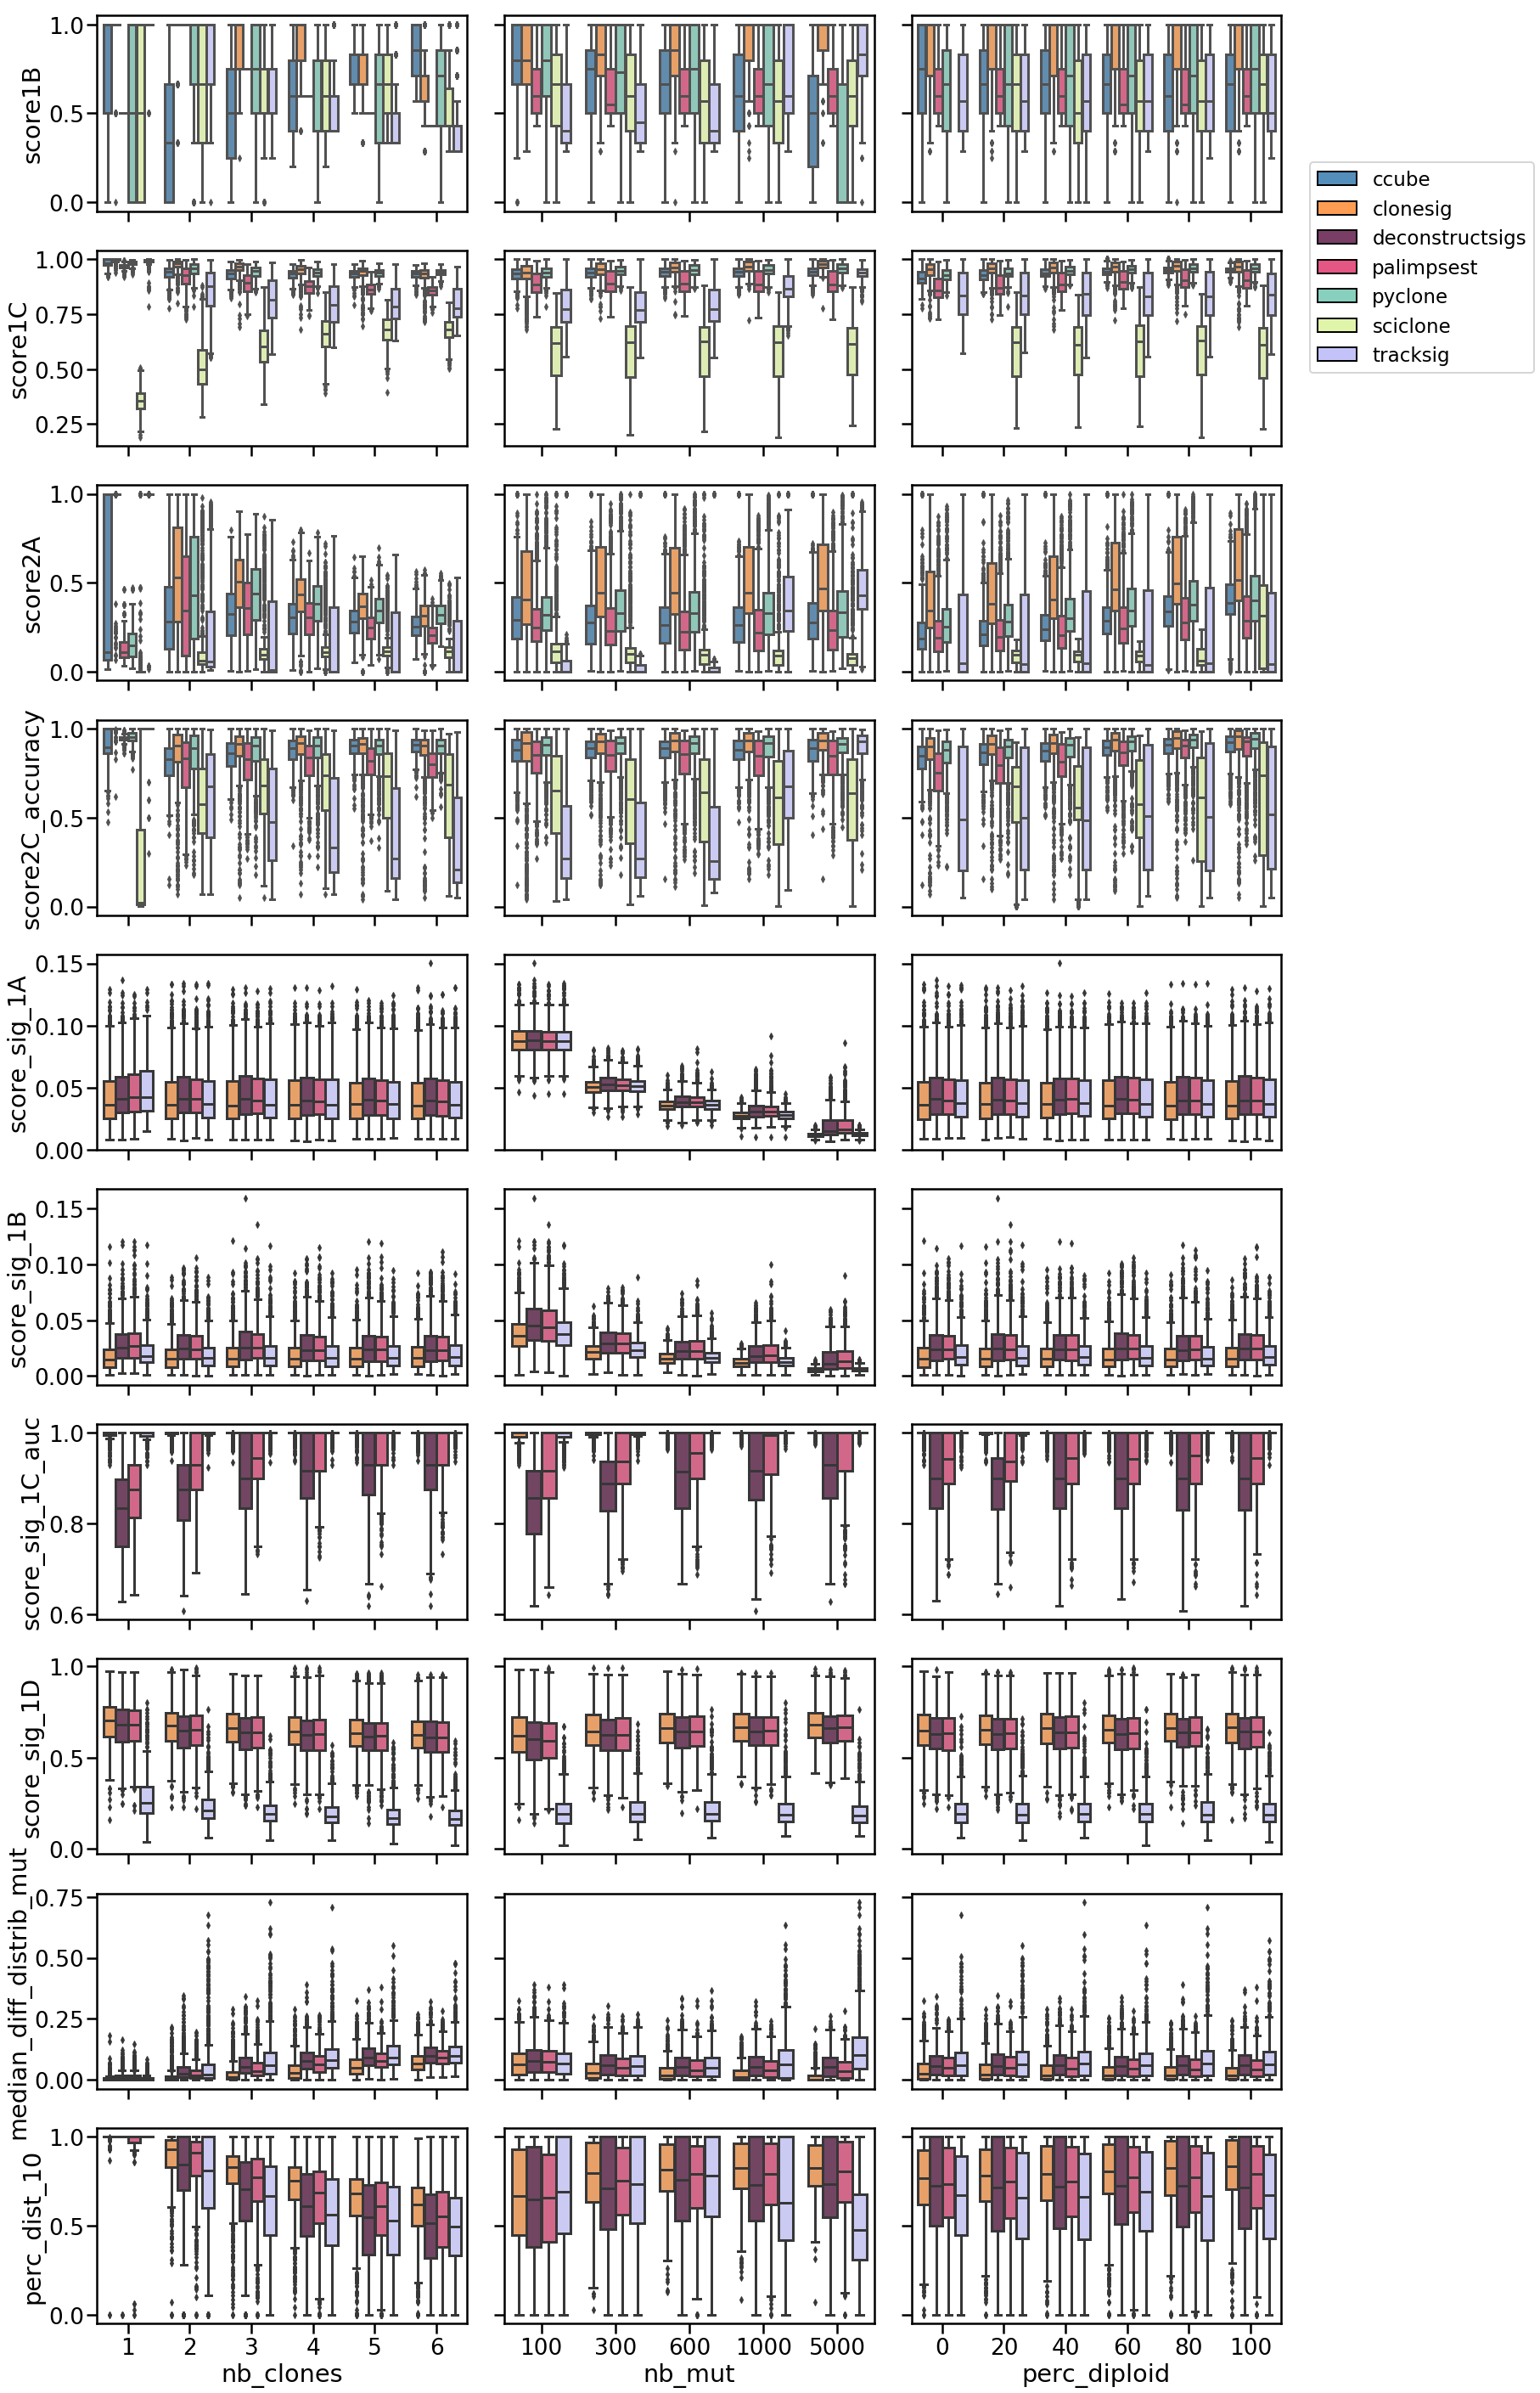

In [30]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(25, 50))
for ii, score in enumerate(('score1B', 'score1C',
                'score2A', 'score2C_accuracy', 'score_sig_1A', 'score_sig_1B',
                'score_sig_1C_auc', 'score_sig_1D',
                'median_diff_distrib_mut', 'perc_dist_10')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
        else:
            sub_clonesig_res = clonesig_res_ith
        if score == 'runtime':
            sub_clonesig_res = clonesig_res


        sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res.full_method.unique()), ax=axes[ii, jj])

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        
        if (ii==0) and (jj==2):
            legend_items = list()
            for key in sorted(sorted(clonesig_res.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=key))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(1.05, 0.3), fontsize=23, loc=2)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
        if ii!=9:
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
plt.subplots_adjust(wspace=0.1)
plt.savefig('20190801_paper_figures/all_comp_method_results.pdf', bbox_inches='tight')


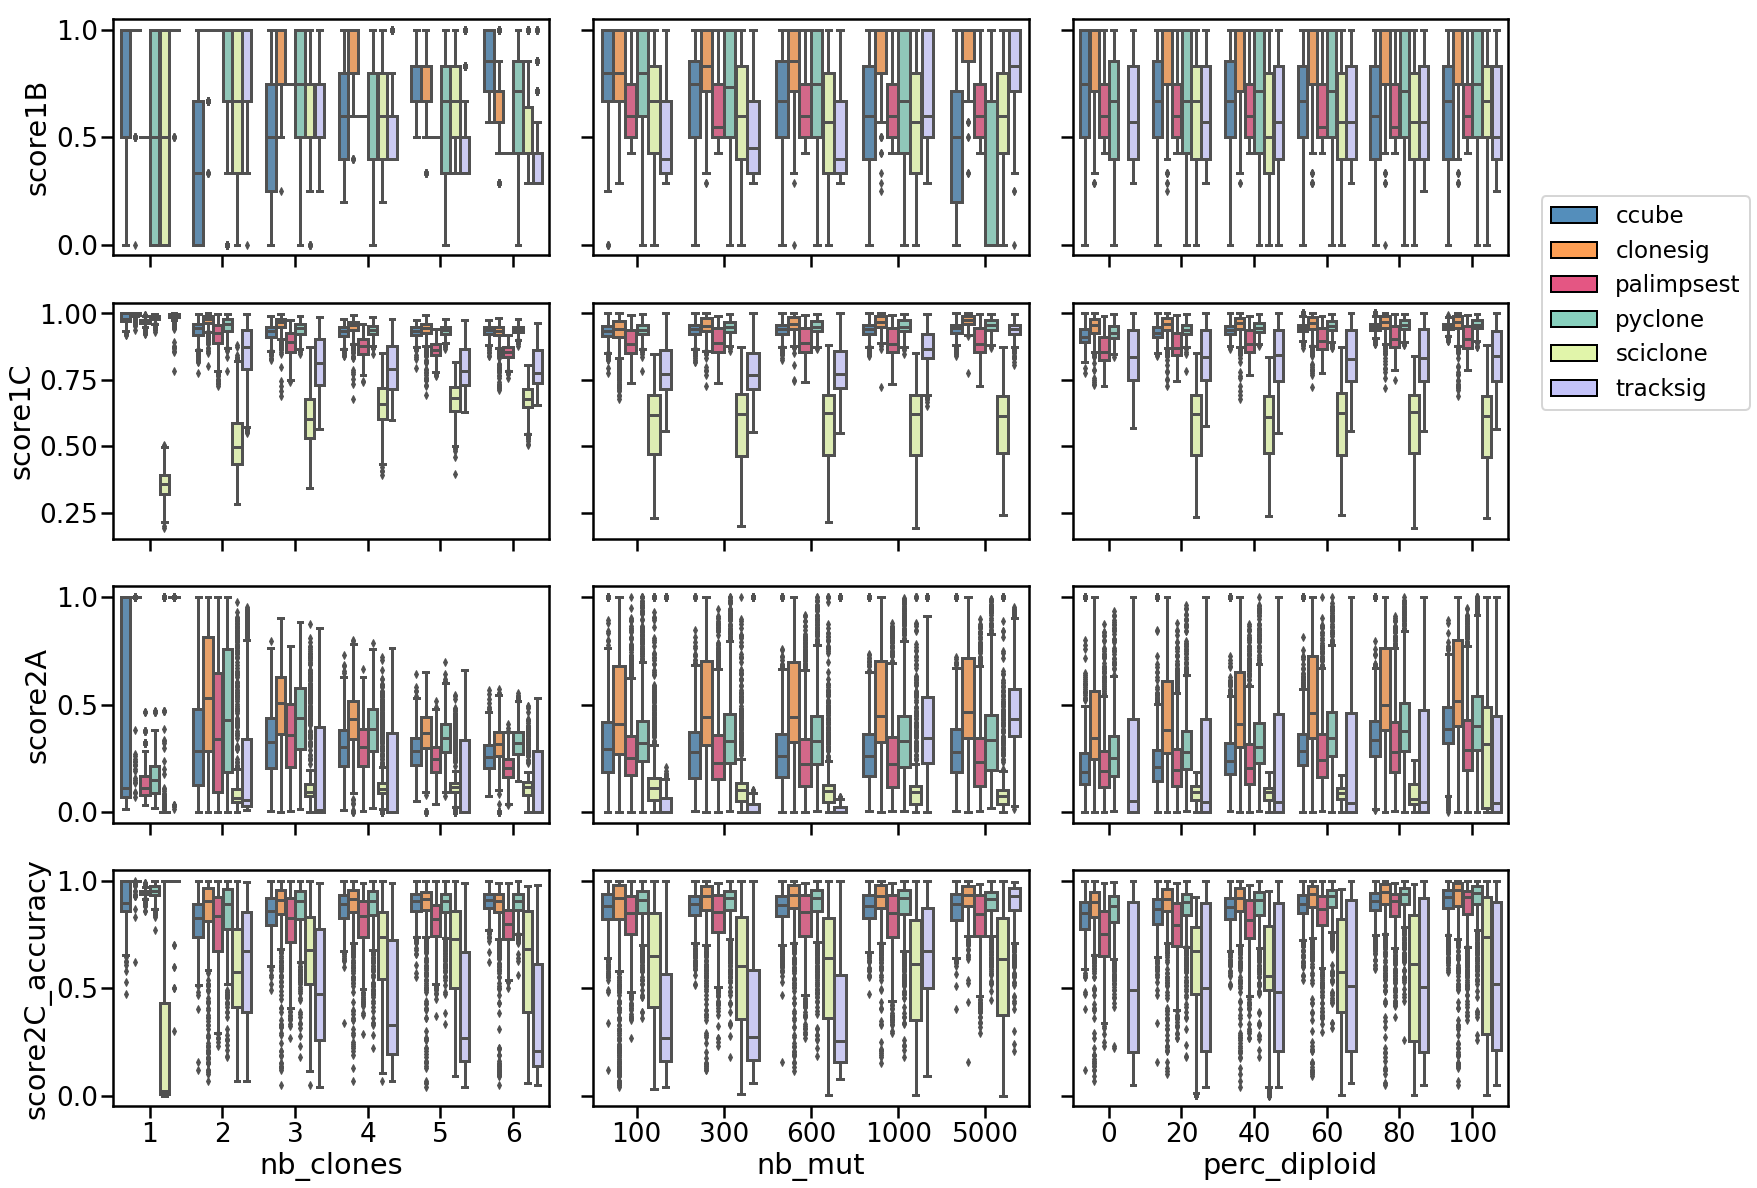

In [35]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))
for ii, score in enumerate(('score1B', 'score1C',
                'score2A', 'score2C_accuracy')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
        else:
            sub_clonesig_res = clonesig_res_ith
        if score == 'runtime':
            sub_clonesig_res = clonesig_res


        sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res.full_method.unique()), ax=axes[ii, jj])

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        
        if (ii==0) and (jj==2):
            legend_items = list()
            for key in sorted(sorted(clonesig_res_ith.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=key))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(1.05, 0.3), fontsize=23, loc=2)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
        if ii!=3:
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
plt.subplots_adjust(wspace=0.1)
plt.savefig('20190801_paper_figures/all_comp_method_results_ith_only.pdf', bbox_inches='tight')


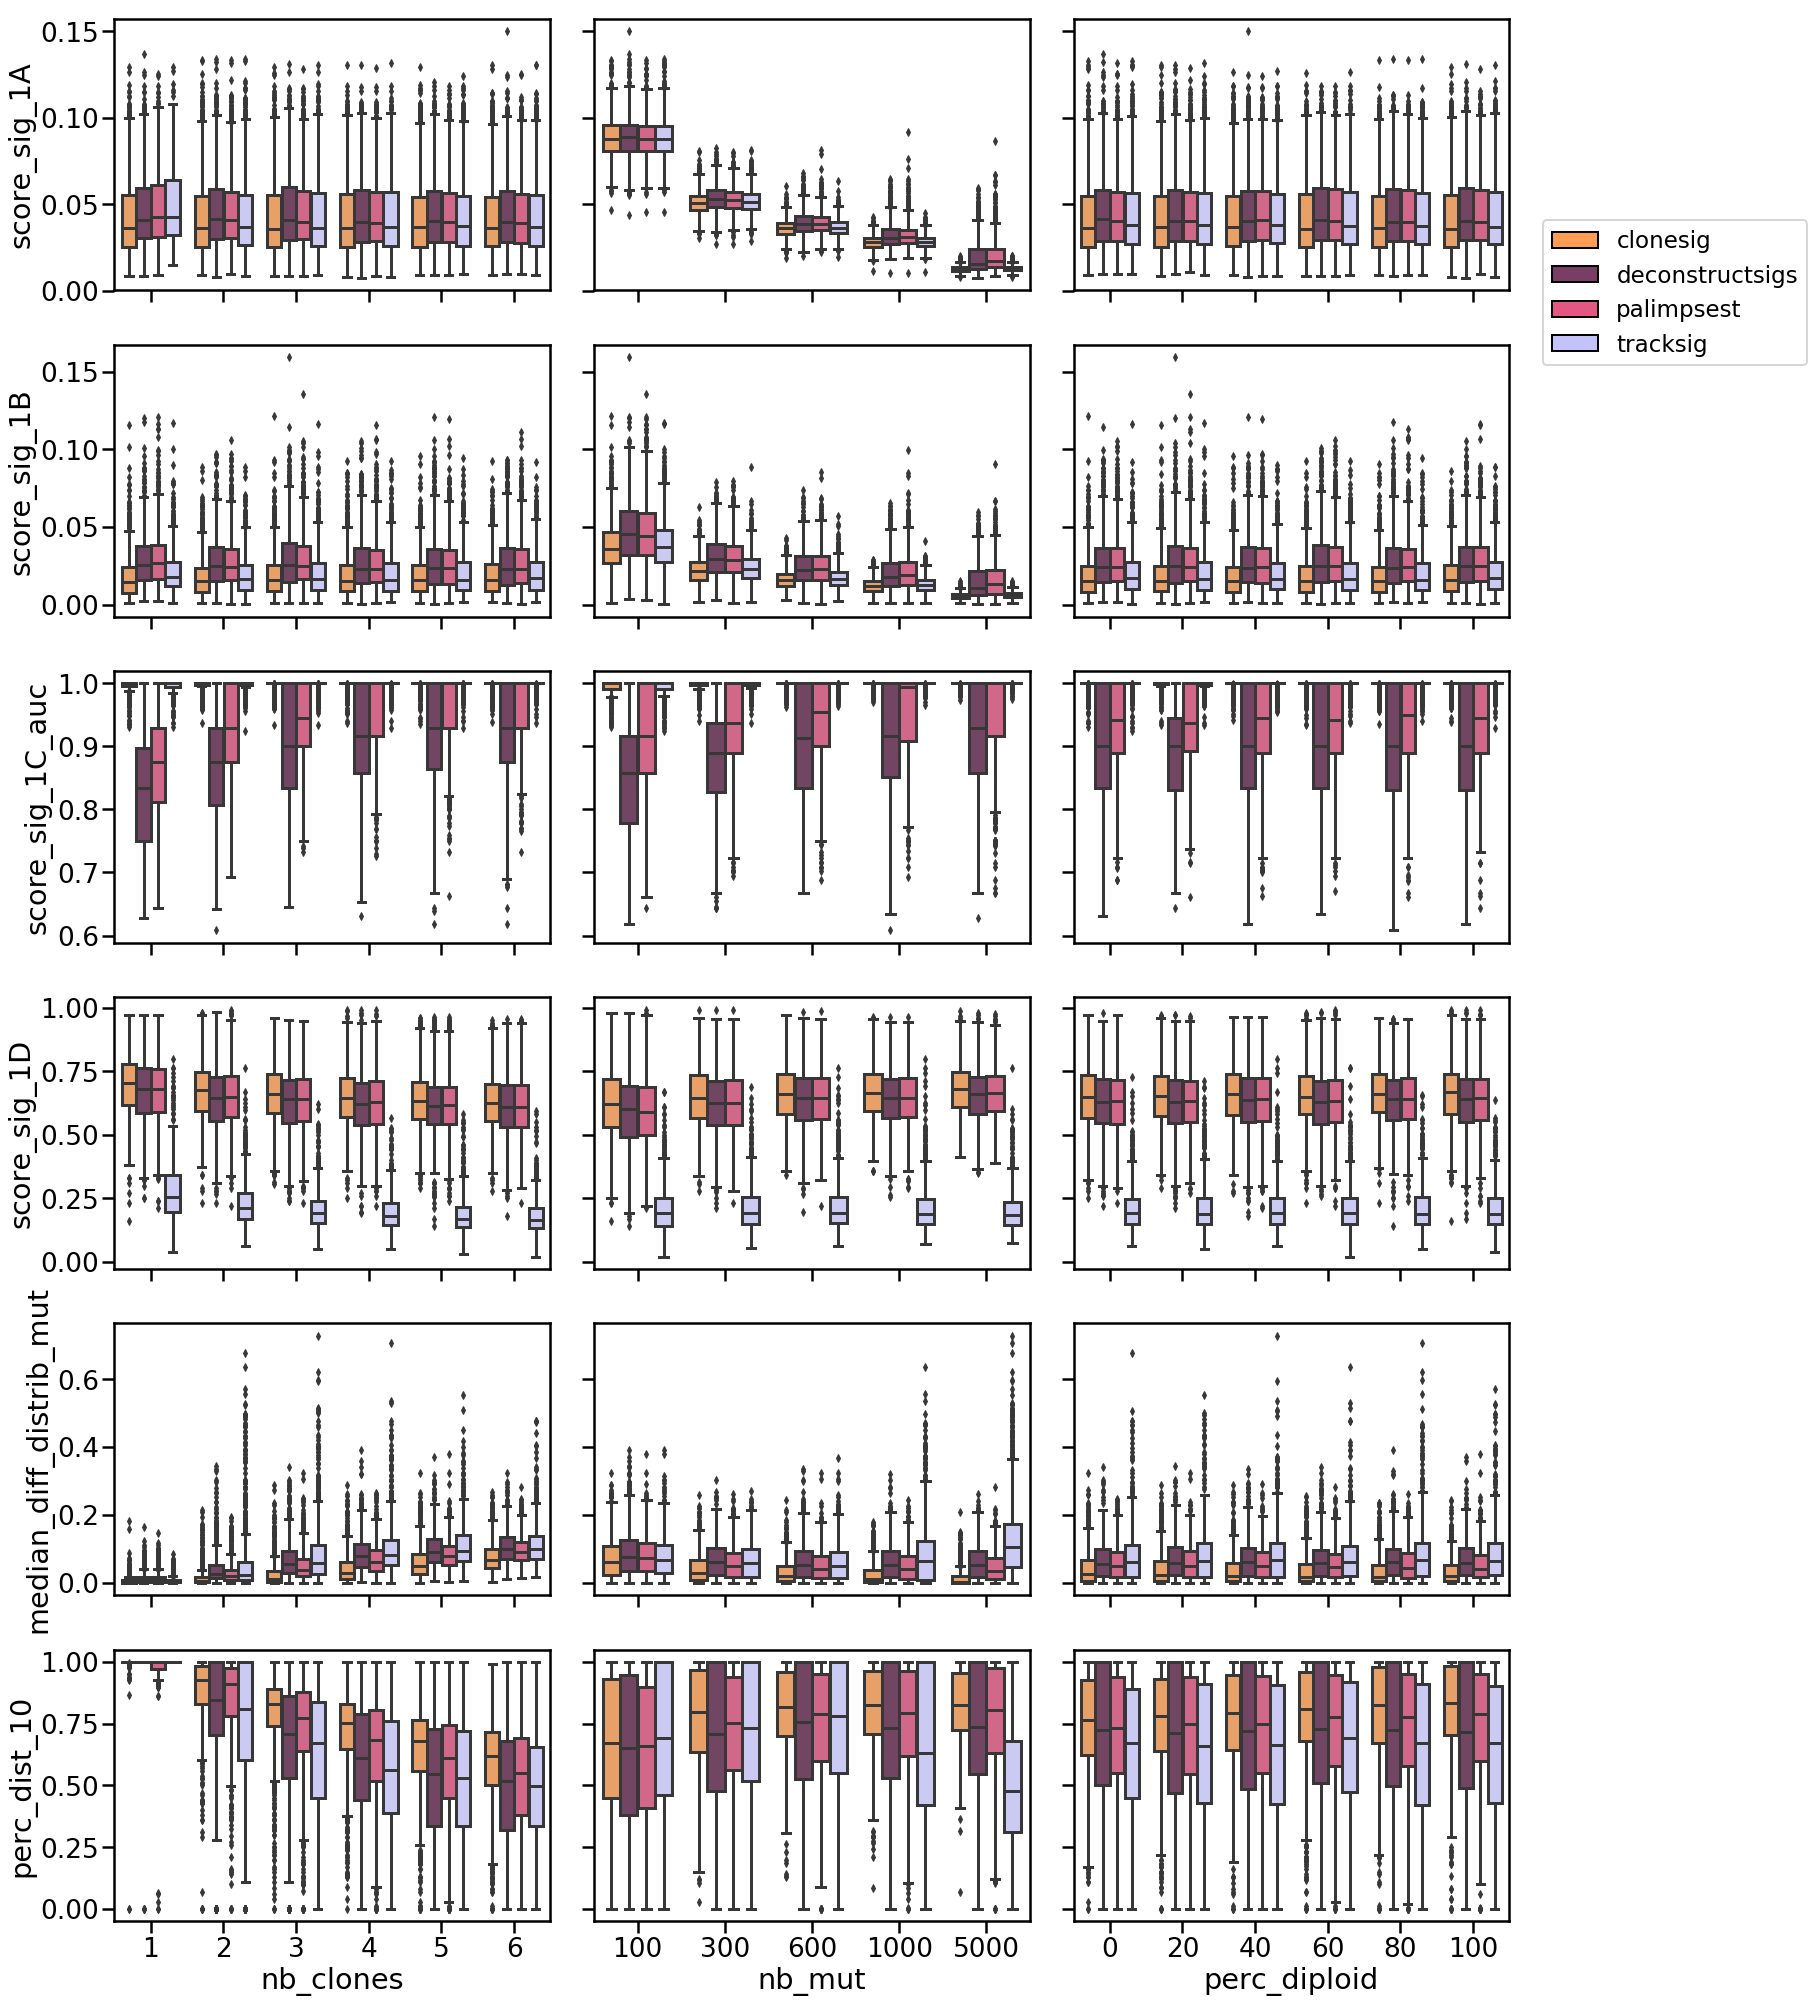

In [34]:
sns.set_context('poster', font_scale=1.2)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 35))
for ii, score in enumerate(('score_sig_1A', 'score_sig_1B',
                'score_sig_1C_auc', 'score_sig_1D',
                'median_diff_distrib_mut', 'perc_dist_10')):
    for jj, covariate in enumerate(('nb_clones', 'nb_mut', 'perc_diploid')):
        if ('sig' in score) or ('score' not in score):
            sub_clonesig_res = clonesig_res_sig
        else:
            sub_clonesig_res = clonesig_res_ith
        if score == 'runtime':
            sub_clonesig_res = clonesig_res


        sns.boxplot(x=covariate, y=score, hue="full_method",
                        data=sub_clonesig_res, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res.full_method.unique())],
                        hue_order=sorted(sub_clonesig_res.full_method.unique()), ax=axes[ii, jj])

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res.full_method.nunique()
        labels = sub_clonesig_res.pivot_table(columns=covariate, values=score,
                                             index="full_method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res.full_method.unique())
        
        if (ii==0) and (jj==2):
            legend_items = list()
            for key in sorted(sorted(clonesig_res_sig.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=key))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(1.05, 0.3), fontsize=23, loc=2)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
        if ii!=5:
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
plt.subplots_adjust(wspace=0.1)
plt.savefig('20190801_paper_figures/all_comp_method_results_sig_only.pdf', bbox_inches='tight')
